In [ ]:
import tensorflow as tf
print(tf.__version__)

# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

# Save the input and target variables
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis = 0)) / targets.std()

2.3.0
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information se

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)
train_data

array([[-0.05273755, -0.04464164,  0.03043966, ..., -0.00259226,
        -0.03075121, -0.0010777 ],
       [-0.04183994, -0.04464164, -0.06656343, ..., -0.03949338,
        -0.05615757, -0.01350402],
       [-0.00914709,  0.05068012,  0.17055523, ...,  0.03430886,
         0.03365681,  0.03205916],
       ...,
       [ 0.03807591,  0.05068012, -0.01375064, ..., -0.00259226,
        -0.02595242, -0.0010777 ],
       [-0.09269548, -0.04464164, -0.04069594, ..., -0.0763945 ,
        -0.04118039, -0.09634616],
       [ 0.01264814, -0.04464164, -0.02560657, ..., -0.0763945 ,
        -0.07212845,  0.01134862]])

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

model = get_model()

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [ ]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae'])

In [ ]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, 
                   validation_split = 0.15, batch_size = 64)

Epoch 1/100
6/6 [==============================] - 0s 33ms/step - loss: 0.8420 - mae: 0.8420 - val_loss: 0.8367 - val_mae: 0.8367
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.8042 - mae: 0.8042 - val_loss: 0.7662 - val_mae: 0.7662
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7167 - mae: 0.7167 - val_loss: 0.6331 - val_mae: 0.6331
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5947 - mae: 0.5947 - val_loss: 0.6307 - val_mae: 0.6307
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6015 - mae: 0.6015 - val_loss: 0.5564 - val_mae: 0.5564
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5914 - mae: 0.5914 - val_loss: 0.5581 - val_mae: 0.5581
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5803 - mae: 0.5803 - val_loss: 0.5574 - val_mae: 0.5574
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5744 - mae: 0.5744 - va

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 2ms/step - loss: 0.4665 - mae: 0.4665


[0.4664595425128937, 0.4664595425128937]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

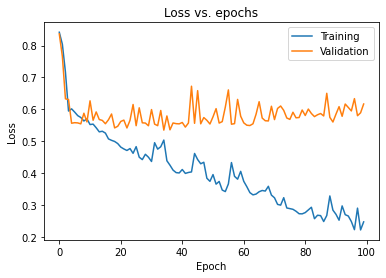

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
predictions = model.predict(test_data)

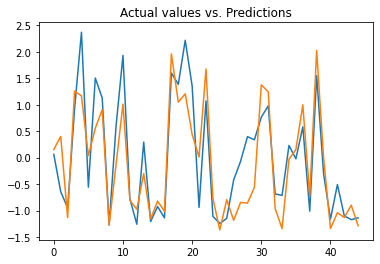

In [ ]:
plt.plot(predictions)
plt.plot(test_targets)
plt.title('Actual values vs. Predictions')
plt.show()